Saving medical cost.csv to medical cost (3).csv
Data preview:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Missing values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Evaluation Metrics:
Mean Absolute Error (MAE): 2517.47
Mean Squared Error (MSE): 18218239.92
R-squared (R²): 0.90


<ipython-input-4-a6ea79eab89a>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


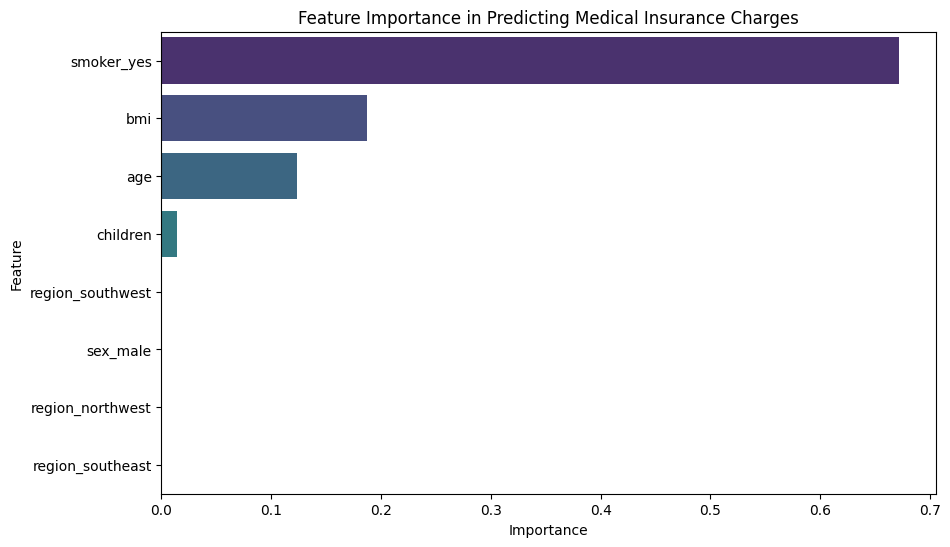

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.preprocessing import OneHotEncoder # for each unique category in a feature, a new binary column is created
                                                # a value of 1 indicates the presence of the category in that row, while a 0 indicates its absence
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns # for visualization

from google.colab import files
uploaded = files.upload()
data = pd.read_csv('medical cost.csv')

print("Data preview:\n", data.head()) # displaying the first five rows of the dataset

print("\nMissing values in each column:\n", data.isnull().sum()) #checking for missing values

data.dropna(subset=['charges'], inplace=True)   # drop the rows which have missing target values, (inplace=true) -> modifies the original DataFrame directly, removing the
                                                # rows/columns containing missing values
                                                # no new DataFrame is created

for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True)  # fill with mode for categorical
        else:
            data[col].fillna(data[col].mean(), inplace=True)      # fill with mean for numerical

data_encoded = pd.get_dummies(data, drop_first=True) #the drop_first parameter is used to avoid the "dummy variable trap" when creating dummy variables for categorical data

#seprating features (x) and target variable(y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state ensures that the same randomization is used each time you run the code,
                                                                                          #resulting in the same splits of the data

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y_train) #model training

y_pred = gbr.predict(X_test) #making predictions on test data

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

feature_importance = gbr.feature_importances_ # extracting feature importance from the model
features = X.columns

# creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

#plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance in Predicting Medical Insurance Charges")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
